In [1]:
import torch
from normalizing_flows.flows import Flow, PrincipalManifoldFlow
from normalizing_flows.bijections import RealNVP

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.insert(0, '../')

from test.shapes import *

sys.path.remove('../')

Text(0.5, 1.0, 'Swirl')

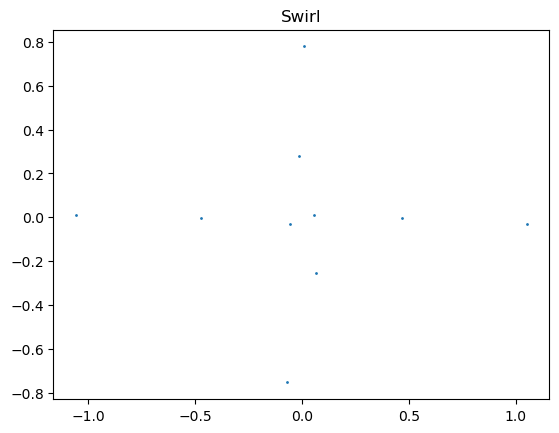

In [3]:
num_points = 10
data_swirl = swirl(radius=1, angle=0, num_points=num_points, noise_std=0.03, seed=0)

# plot data
plt.figure()
plt.scatter(data_swirl[0], data_swirl[1], s=1)
plt.title('Swirl')

In [4]:
# prepare the data
data_tensor = torch.tensor(np.stack(data_swirl, axis=1)).float()  # Create a tensor from the data
n_dim = 2

In [5]:
# torch.manual_seed(0)
# normal_flow = Flow(RealNVP(n_dim, n_layers=10), record_Ihat_P=True, record_log_px=True)
# normal_flow.fit(data_tensor, show_progress=True)

In [6]:
# x = torch.tensor([[0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5]]).float()
# result = torch.vmap(normal_flow.bijection.forward, chunk_size=1)(x.unsqueeze(1))
# print(result)

In [7]:
# NF_log_px = normal_flow.get_log_px()
# NF_Ihat_P = normal_flow.get_Ihat_P()

# # print all
# print("NF_log_px: ", len(NF_log_px))
# print("NF log_px average: ", torch.mean(NF_log_px))
# print("NF_Ihat_P: ", len(NF_Ihat_P))
# print("NF Ihat_P average: ", torch.mean(NF_Ihat_P))

In [8]:
torch.manual_seed(0)
PM_flow = PrincipalManifoldFlow(RealNVP(n_dim, n_layers=10), record_Ihat_P=True, record_log_px=True, debug=False, objective="unbiased")
PM_flow.fit(data_tensor, show_progress=True)

Fitting Principal Manifold Flow:   0%|          | 0/500 [00:00<?, ?it/s]

x shape:  torch.Size([2])
x:  GradTrackingTensor(lvl=2, value=
    BatchedTensor(lvl=1, bdim=0, value=
        tensor([[ 0.0672, -0.2531],
                [ 1.0529, -0.0293],
                [ 0.4706, -0.0045],
                [ 0.0560,  0.0123],
                [-0.0120,  0.2785],
                [-0.0672, -0.7531],
                [-0.4706, -0.0045],
                [-1.0560,  0.0123],
                [ 0.0120,  0.7785],
                [-0.0529, -0.0293]])
    )
)
x.shape (inside bijective composition):  GradTrackingTensor(lvl=2, value=
    BatchedTensor(lvl=1, bdim=0, value=
        tensor([[[ 0.0672, -0.2531]],

                [[ 1.0529, -0.0293]],

                [[ 0.4706, -0.0045]],

                [[ 0.0560,  0.0123]],

                [[-0.0120,  0.2785]],

                [[-0.0672, -0.7531]],

                [[-0.4706, -0.0045]],

                [[-1.0560,  0.0123]],

                [[ 0.0120,  0.7785]],

                [[-0.0529, -0.0293]]])
    )
)
ElementwiseAffin

RuntimeError: output with shape [1] doesn't match the broadcast shape [10, 1]